In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

In [3]:
df=sns.load_dataset('iris')


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


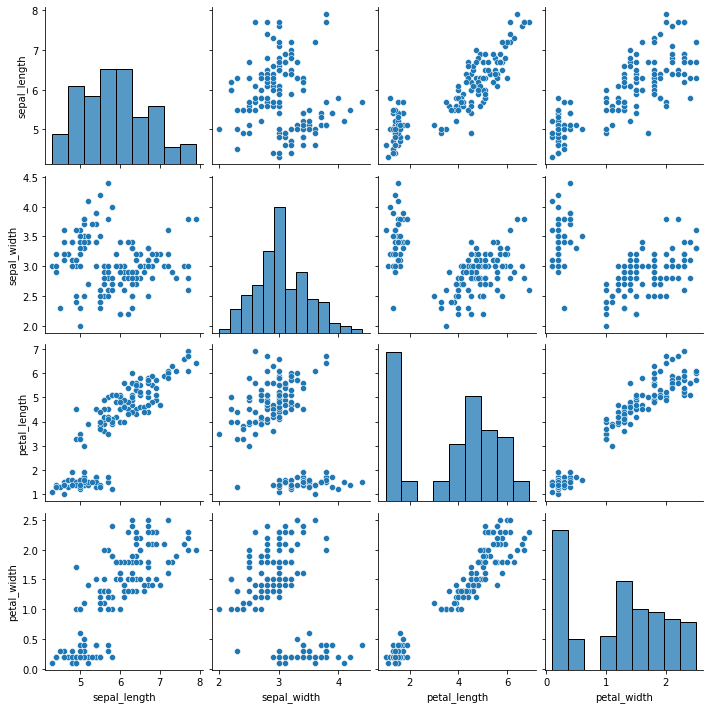

In [6]:
sns.pairplot(data=df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
features = ['sepal_length','sepal_width','petal_length','petal_width']

# Create features matrix
x = df.loc[:, features].values

In [9]:
y=df.species

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

In [13]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [14]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [15]:
clf.predict(x_test[0:1])

array(['virginica'], dtype=object)

In [16]:
from sklearn import metrics

In [17]:
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [18]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.83      0.94      0.88        16
   virginica       0.86      0.67      0.75         9

    accuracy                           0.89        38
   macro avg       0.90      0.87      0.88        38
weighted avg       0.90      0.89      0.89        38



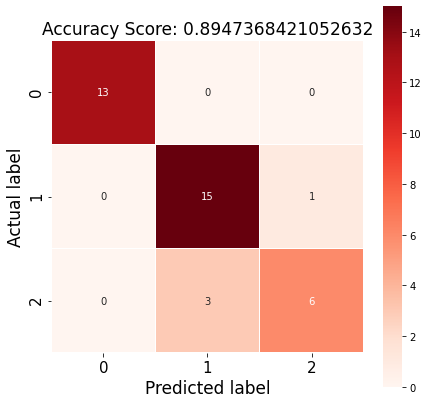

In [30]:
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Reds');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [31]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    accuracy.append(score)

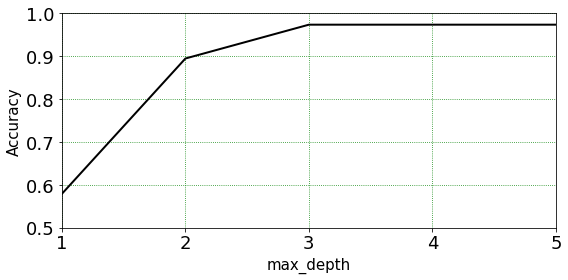

In [34]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,4));

ax.plot(max_depth_range,
        accuracy,
        lw=2,
        color='k')

ax.set_xlim([1, 5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = ':',
        color = 'g')


ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 15)
ax.set_ylabel('Accuracy', fontsize = 15)
fig.tight_layout()
#fig.savefig('images/max_depth_vs_accuracy.png', dpi = 300)

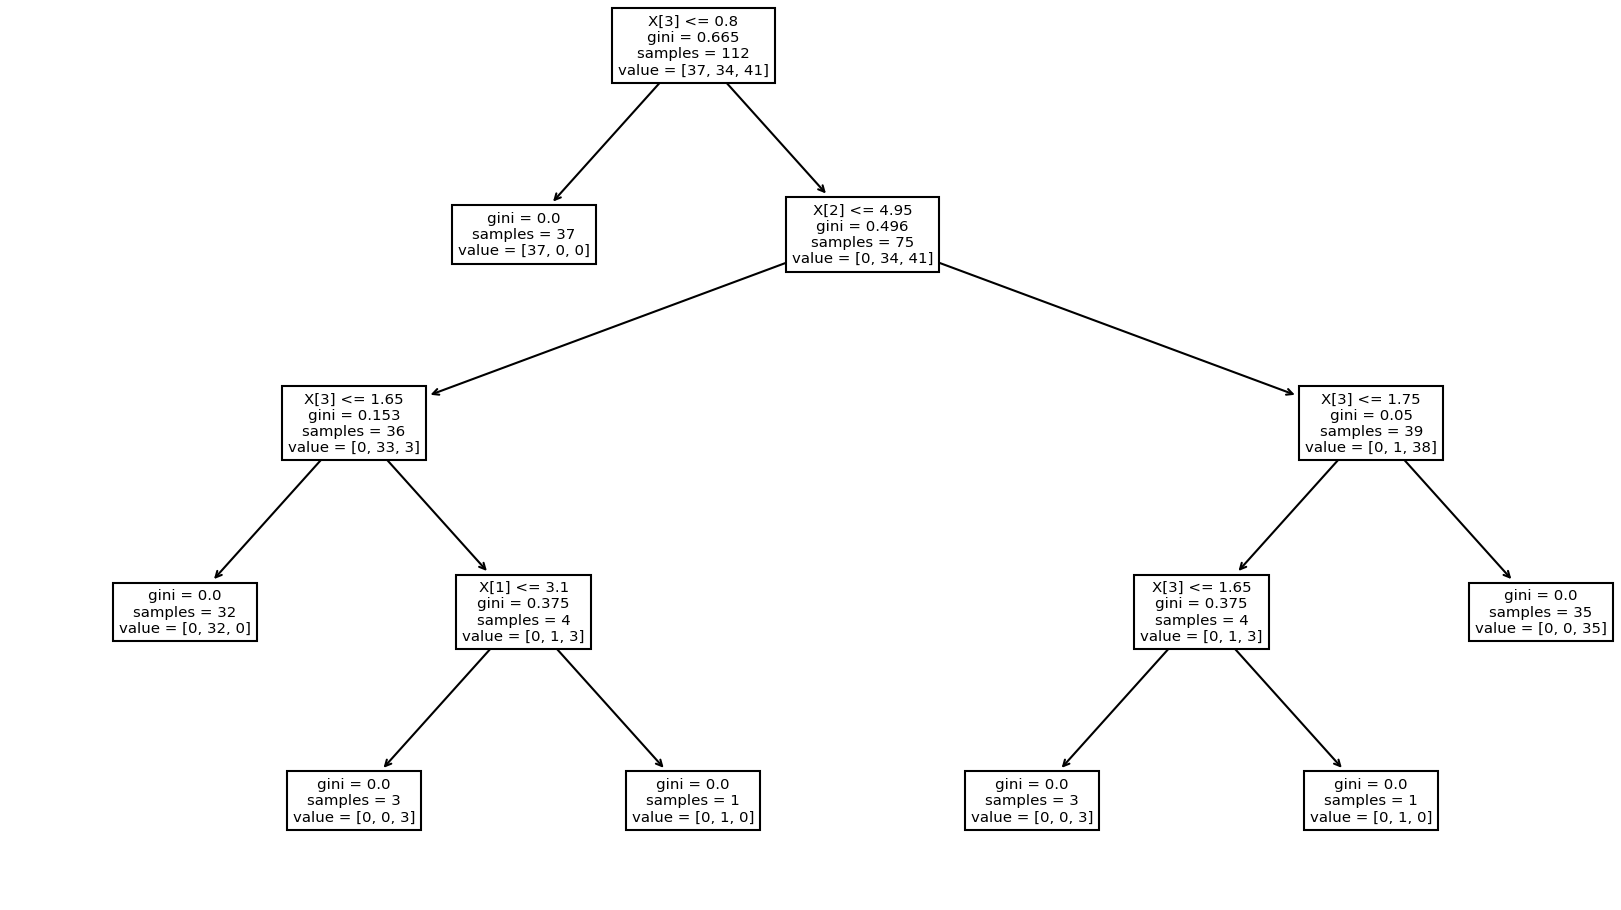

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)

tree.plot_tree(clf);

In [37]:
# Putting the feature names and class names into variables
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

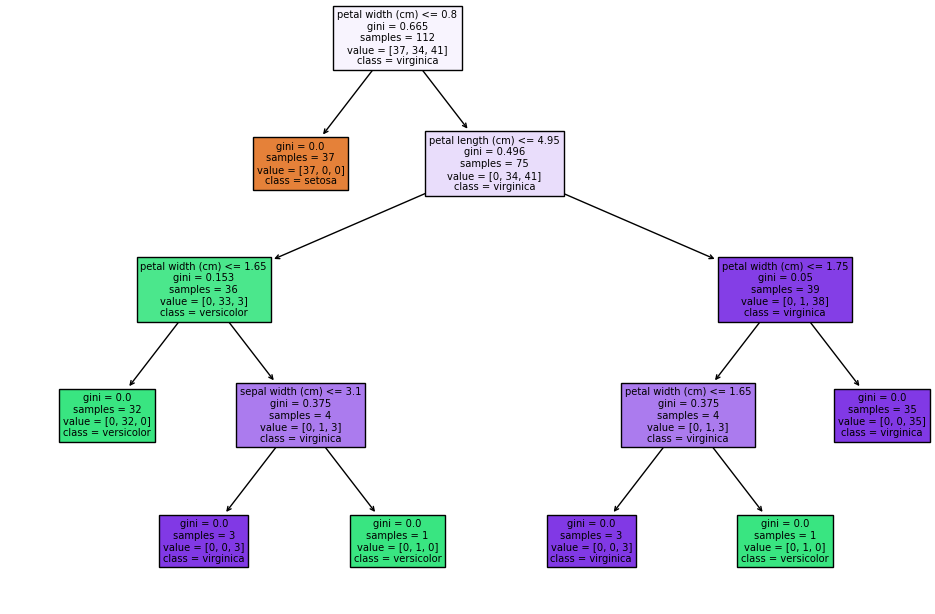

In [42]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (9,6), dpi = 100)

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('images/plottreefncn.png')